In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-study-performance/study_performance.csv


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/student-study-performance/study_performance.csv')


In [74]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In this notebook, we will analyse the impact of scores based on the ethnicity,parental level of education , lunch and test preparation as well as gender

First we will analyse how the parental level affects the child's performance.I will take the mean score of the tests and compare different parental levels.

In [76]:
df_parental = df[['parental_level_of_education','math_score','reading_score','writing_score']]

In [77]:
df_parental_grouped = df_parental.groupby('parental_level_of_education').mean()

In [78]:
df_parental_grouped.head()

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708


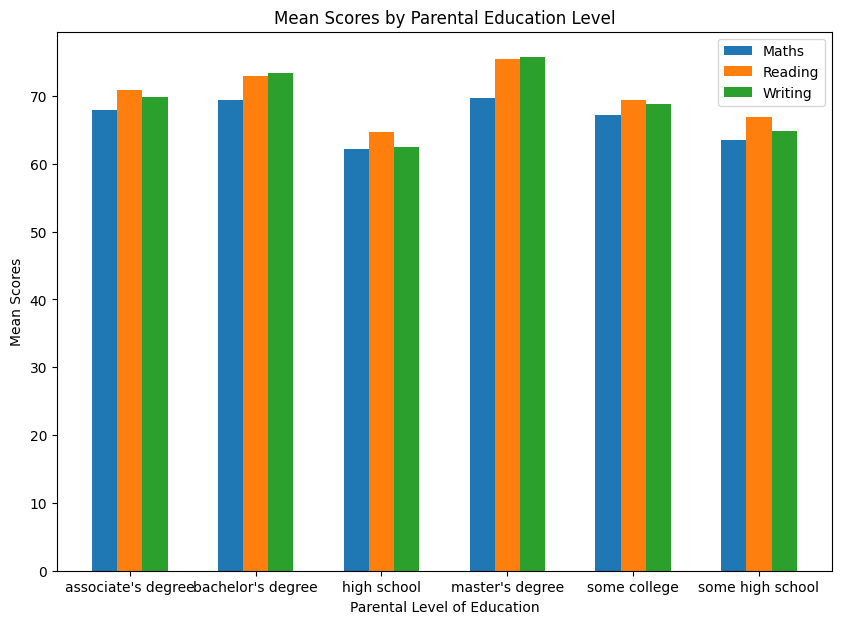

In [79]:
mean_math = df_parental_grouped['math_score']
mean_reading = df_parental_grouped['reading_score']
mean_writing = df_parental_grouped['writing_score']

categories = df_parental_grouped.index

fig, ax = plt.subplots(figsize=(10,7))
bar_width = 0.20
index = range(len(categories))

bar_math = ax.bar(index, mean_math, bar_width, label='Maths')
bar_reading = ax.bar([i + bar_width for i in index], mean_reading, bar_width, label='Reading')
bar_writing = ax.bar([i + bar_width * 2 for i in index], mean_writing, bar_width, label='Writing')

ax.set_xlabel('Parental Level of Education')
ax.set_ylabel('Mean Scores')
ax.set_title('Mean Scores by Parental Education Level')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(categories)
ax.legend()

plt.show()

We can observe that students' whose parents have completed Master's degree and Bachelor's degree have higher scores on average especially in reading and writing. We can also observe that students whose parents have only high school education have the least average marks in all the subjects.
This implies that students' performance in school does depend on how much level of education their parents have.

Now,we observe how test preparation affects the score.We will use box plots to analyse the score of Maths subject. 

In [80]:
df[['test_preparation_course','math_score']].head()

,test_preparation_course,math_score
0,none,72
1,completed,69
2,none,90
3,none,47
4,none,76


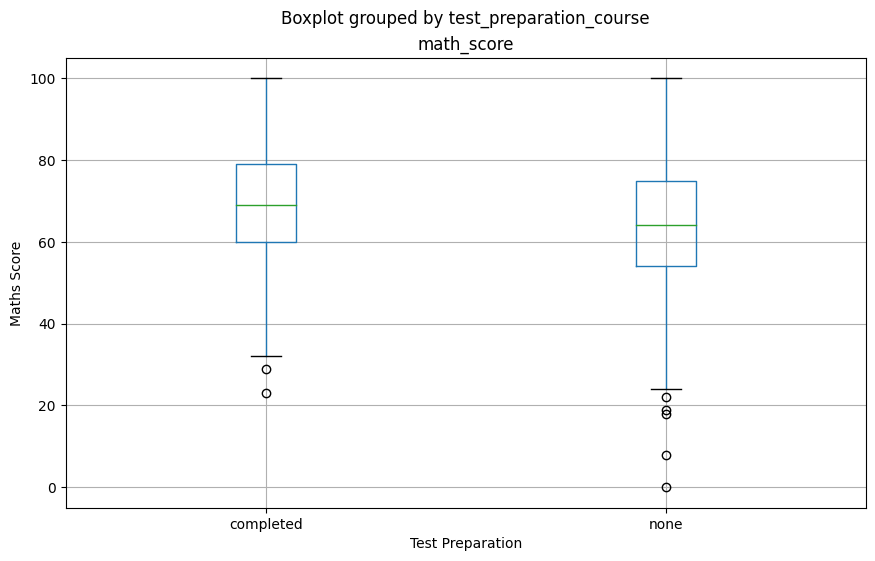

In [81]:
df.boxplot(column='math_score', by='test_preparation_course', figsize=(10, 6))

plt.xlabel('Test Preparation')
plt.ylabel('Maths Score')


plt.show()


Although we observe that the median value increased for students with complete test preparation.But we are observing a lot of outliers in the case of 'none' preparation. This means that analysing the test scores on the basis of test preparation does not give a solid relationship between the two.

Now we will check how having lunch before the test affects the score of the student. Again, the box plot will be used for the analysis.

In [121]:
df['total average score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])/3
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

In [122]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total average score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,148
4,male,group C,some college,standard,none,76,78,75,76.333333,229


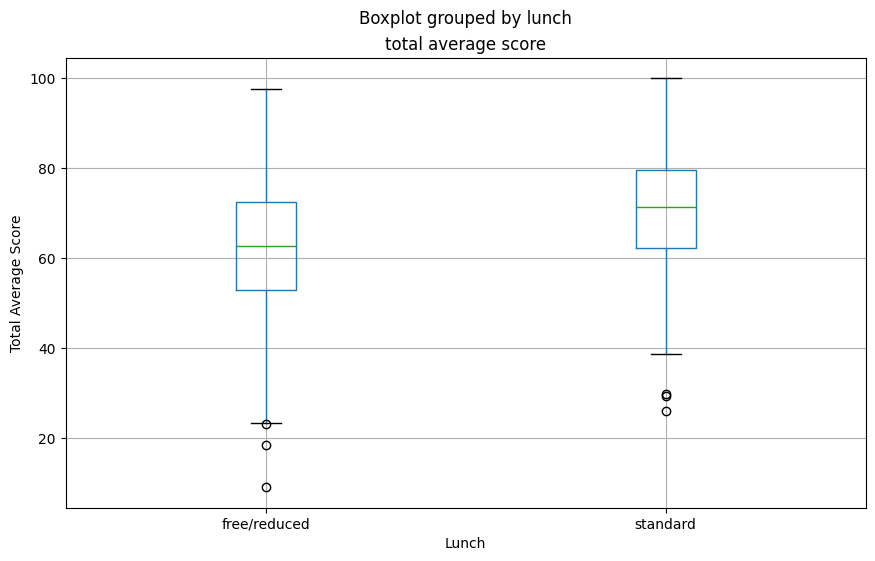

In [84]:
df.boxplot(column= 'total average score',by = 'lunch',figsize = (10,6))
plt.xlabel('Lunch')
plt.ylabel('Total Average Score')
plt.show()

We can clearly observe that the students performed in the test when they had lunch before the exam. This implies that eating a proper meal before the exam really affects the test scores.The median 'total average score' is nearly 70 for students who had lunch in comparison to approximately 62 for the rest of the students. 

Now we will be comparing the average marks for each subject based on the gender

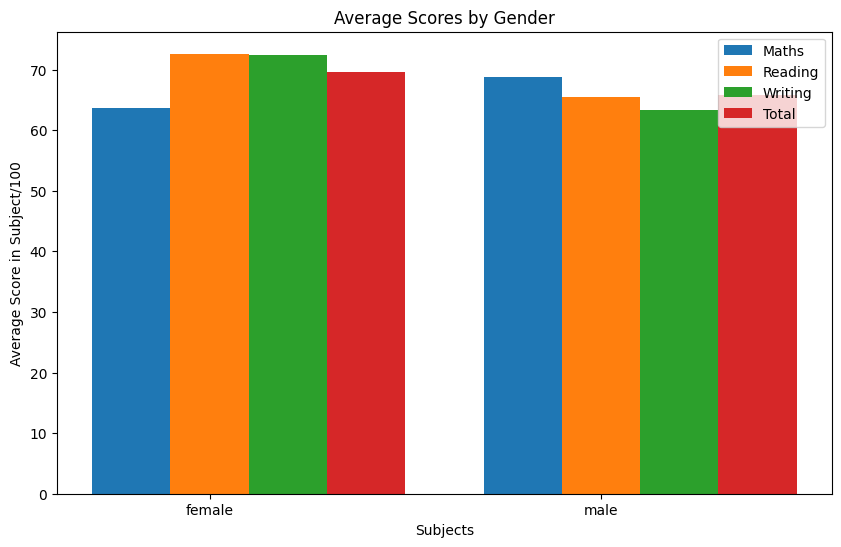

In [116]:
df_gen = df.groupby('gender')[['math_score','reading_score','writing_score']].mean().reset_index()
df_gen['total_avg'] = (df_gen['math_score'] + df_gen['reading_score'] + df_gen['writing_score'])/3
values1 = df_gen['math_score']
values2 = df_gen['reading_score']
values3 = df_gen['writing_score']
values4 = df_gen['total_avg']

categories_gen = df_gen.index
gender_labels = df_gen['gender']

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2 
index = range(len(categories_gen))

bar1 = ax.bar(index, values1, bar_width, label='Maths')
bar2 = ax.bar([i + bar_width for i in index], values2, bar_width, label='Reading')
bar3 = ax.bar([i + bar_width * 2 for i in index], values3, bar_width, label='Writing')
bar4 = ax.bar([i + bar_width * 3 for i in index], values4, bar_width, label='Total')

ax.set_xlabel('Subjects')
ax.set_ylabel('Average Score in Subject/100')
ax.set_title('Average Scores by Gender')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(gender_labels)
ax.legend()

plt.show()



We can observe that males have a better average score in Maths , but overall total of females is better than the males. This is contributed by the big difference in the reading and writing scores.

Now we will compare the number of male students and female students for each ethinicity.







In [85]:
df_num_gender = df.groupby(['race_ethnicity','gender']).count().reset_index()

df_num_gender = df_num_gender[['race_ethnicity','gender','parental_level_of_education']]


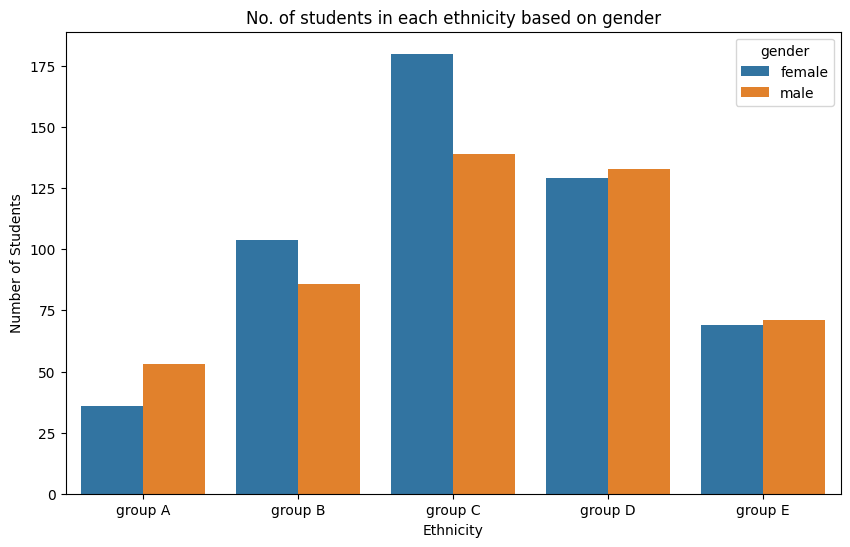

In [86]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'race_ethnicity',y='parental_level_of_education',hue = 'gender',data = df_num_gender)

plt.xlabel('Ethnicity')
plt.ylabel('Number of Students')
plt.title('No. of students in each ethnicity based on gender')
plt.show()

We can clearly observe that there are lesser students from group A and it also has lesser female students compared to the male students.However, we also observe that there is a huge difference in the number of female and male students in group C. For the rest of the groups, there is equality in terms of the number of students. Now, we will analyse the parental level for each ethnicity

In [98]:
df_edu = df[df['parental_level_of_education'].isin(["bachelor's degree","master's degree","some college","associate's degree"])]
df_edu = df_edu.groupby('race_ethnicity')['parental_level_of_education'].count().reset_index()
df_edu = df_edu.rename(columns = {'parental_level_of_education':'college_graduates'})
df_edu


,race_ethnicity,college_graduates
0,group A,47
1,group B,104
2,group C,206
3,group D,168
4,group E,100


In [99]:
df_total = df.groupby('race_ethnicity')['parental_level_of_education'].count().reset_index()
df_total = df_total.rename(columns = {'parental_level_of_education':'total'} )
df_total

,race_ethnicity,total
0,group A,89
1,group B,190
2,group C,319
3,group D,262
4,group E,140


In [107]:
parental_edu_df = pd.merge(df_edu,df_total,on = 'race_ethnicity')
parental_edu_df['percent_college_grads'] = (parental_edu_df['college_graduates']/parental_edu_df['total'])*100
parental_edu_df

,race_ethnicity,college_graduates,total,percent_college_grads
0,group A,47,89,52.808989
1,group B,104,190,54.736842
2,group C,206,319,64.576803
3,group D,168,262,64.122137
4,group E,100,140,71.428571


We observe that group E has the highest percentage of college graduates as compared to other ethnicities. We also observe that the group A and group B have nearly 50 percent of parents who have only attended high school. Lets check how the median 'total average score' compares for these ethnicities. 

In [123]:
df_eth = df.groupby('race_ethnicity')['total_score'].median().reset_index()
df_eth = df_eth.rename(columns = {'total_score': 'median total score'})
df_eth

,race_ethnicity,median total score
0,group A,184.0
1,group B,195.0
2,group C,205.0
3,group D,210.0
4,group E,220.5


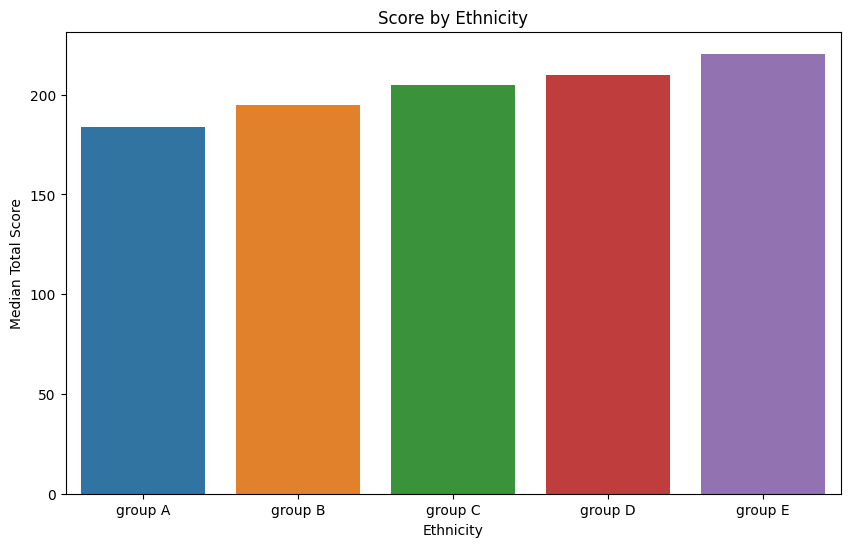

In [124]:
plt.figure(figsize=(10, 6))
sns.barplot(x='race_ethnicity', y='median total score', data= df_eth)

plt.xlabel('Ethnicity')
plt.ylabel('Median Total Score')
plt.title('Score by Ethnicity')

# Show plot
plt.show()


We can observe that it makes sense why group E has the highest median total score. This is because majority of the parents in this ethnicity have a college degree which does affect their child's performance in school.


**Therefore , we can conclude that the parental level of education affects the student's performance in the school**